In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)


#reading data set
dataset=pd.read_csv('loan-prediction.csv')


#data cleaning
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset.fillna(method='ffill',inplace = True) #replace nan value by replaching exhisting prev value
#dataset.dropna(how='any',inplace=True)

#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)


dataset=d
dataset.to_csv('loan-prediction1.csv',index=False)


from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
#split the data set for training and testing
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2017) #random state=same seed


from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std=sc.transform(X)


from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

#MLPClassifier(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10
#activation :‘identity’, ‘logistic’, ‘tanh’, ‘relu’
#solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
#alpha: L2 penalty (regularization term) parameter
#max_iter: epoch


#mlp = MLPClassifier(activation='logistic', solver='lbfgs',learning_rate_init=0.0001,
#                    alpha=1e-5,hidden_layer_sizes=(100, 3), random_state=1,max_iter=2000)

svm_cls = svm.SVC(gamma=0.05,C=100)
dt = DecisionTreeClassifier(criterion='gini',random_state=5)#,max_depth = 4,min_samples_leaf = 5)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,learning_rate=0.01, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(100,2), activation='logistic',max_iter=1000,learning_rate_init=0.005,tol=1e-41,solver='adam')
#from sklearn.neural_network import MLPClassifier

svm_cls.fit(X_train_std, y_train)
mlp.fit(X_train_std, y_train)
dt.fit(X_train_std, y_train)
ada.fit(X_train_std, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix, classification_report


print("Training set score Support Vector Machines: %f" % svm_cls.score(X_train_std, y_train))
print("Training set score MLP: %f" % mlp.score(X_train_std, y_train))
print("Training set score DT: %f" % dt.score(X_train_std, y_train))
print("Training set score Adaboost: %f" % ada.score(X_train_std, y_train))


print("Test set score Support Vector Machines: %f" % svm_cls.score(X_test_std, y_test))
print("Test set score MLp: %f" % mlp.score(X_test_std, y_test))
print("Test set score dt: %f" % dt.score(X_test_std, y_test))
print("Test set score Adaboost: %f" % ada.score(X_test_std, y_test))


print("Total score Support Vector Machines: %f" % svm_cls.score(X_std, y))
print("Total score MLP: %f" % mlp.score(X_std, y))
print("Total score dt: %f" % dt.score(X_std, y))
print("Total set score Adaboost: %f" % ada.score(X_std, y))

#print("Classification report for svm_cls:\n%s\n"% (classification_report(y_test, svm_cls.predict(X_test_std))))
print("Confusion matrix for svm_cls on test:\n%s" % (confusion_matrix(y_test, svm_cls.predict(X_test_std))))

#print("Classification report for dt:\n%s\n"% (classification_report(y_test, dt.predict(X_test_std))))
print("Confusion matrix for dt on test:\n%s" % (confusion_matrix(y_test, dt.predict(X_test_std))))

#print("Classification report for ada:\n%s\n"% (classification_report(y_test, ada.predict(X_test_std))))
print("Confusion matrix for ada on test:\n%s" % (confusion_matrix(y_test, ada.predict(X_test_std))))

#print("Classification report for mlp:\n%s\n"% (classification_report(y_test, mlp.predict(X_test_std))))
print("Confusion matrix for mlp on test:\n%s" % (confusion_matrix(y_test, mlp.predict(X_test_std))))



#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score


cvs=cross_val_score(svm_cls, X_std, y, cv=5)
print(cvs)
cvs=cross_val_score(dt , X_std, y, cv=5)
print(cvs)
cvs=cross_val_score(ada , X_std, y, cv=5)
print(cvs)
cvs=cross_val_score(mlp , X_std, y, cv=5)
print(cvs)


from sklearn.externals import joblib #dumping and loading model
joblib.dump(svm_cls,'svm_cls_model.joblib')
joblib.dump(dt,'dt_model.joblib')
joblib.dump(ada,'ada_model.joblib')
joblib.dump(mlp,'mlp_model.joblib')


In [36]:
l=[0.78225806 ,0.70967742 ,0.75409836 ,0.7704918,0.79508197]
import statistics as stat
u=stat.mean(l)
print(u)

0.762321522


In [39]:
#print("Classification report for svm_cls:\n%s\n"% (classification_report(y_train, svm_cls.predict(X_train_std))))
print("Confusion matrix for svm_cls on train:\n%s" % (confusion_matrix(y_train, svm_cls.predict(X_train_std))))

#print("Classification report for dt:\n%s\n"% (classification_report(y_train, dt.predict(X_train_std))))
print("Confusion matrix for dt on train:\n%s" % (confusion_matrix(y_train, dt.predict(X_train_std))))

#print("Classification report for ada:\n%s\n"% (classification_report(y_train, ada.predict(X_train_std))))
print("Confusion matrix for ada on train:\n%s" % (confusion_matrix(y_train, ada.predict(X_train_std))))

#print("Classification report for mlp:\n%s\n"% (classification_report(y_train, mlp.predict(X_train_std))))
print("Confusion matrix for mlp on train:\n%s" % (confusion_matrix(y_train, mlp.predict(X_train_std))))


Confusion matrix for svm_cls on train:
[[110  26]
 [  2 291]]
Confusion matrix for dt on train:
[[136   0]
 [  0 293]]
Confusion matrix for ada on train:
[[136   0]
 [  0 293]]
Confusion matrix for mlp on train:
[[ 87  49]
 [ 11 282]]


In [40]:
#print("Classification report for svm_cls:\n%s\n"% (classification_report(y, svm_cls.predict(X_std))))
print("Confusion matrix for svm_cls on total:\n%s" % (confusion_matrix(y, svm_cls.predict(X_std))))

#print("Classification report for dt:\n%s\n"% (classification_report(y, dt.predict(X_std))))
print("Confusion matrix for dt on total:\n%s" % (confusion_matrix(y, dt.predict(X_std))))

#print("Classification report for ada:\n%s\n"% (classification_report(y, ada.predict(X_std))))
print("Confusion matrix for ada on total:\n%s" % (confusion_matrix(y, ada.predict(X_std))))

#print("Classification report for mlp:\n%s\n"% (classification_report(y, mlp.predict(X_std))))
print("Confusion matrix for mlp on total:\n%s" % (confusion_matrix(y, mlp.predict(X_std))))


Confusion matrix for svm_cls on total:
[[131  61]
 [ 15 407]]
Confusion matrix for dt on total:
[[157  35]
 [ 18 404]]
Confusion matrix for ada on total:
[[161  31]
 [ 19 403]]
Confusion matrix for mlp on total:
[[107  85]
 [ 19 403]]


C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


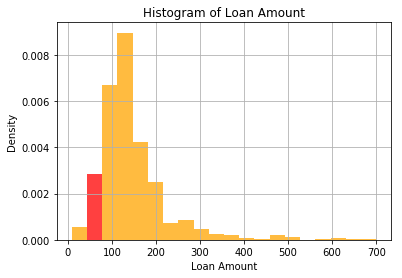

In [2]:

n, bins, patches = plt.hist(X['LoanAmount'].values, bins=20, facecolor='orange', alpha=0.75, normed=True)
plt.setp(patches[1], 'facecolor', 'r')
plt.ylabel('Density')
plt.xlabel('Loan Amount')
plt.title('Histogram of Loan Amount')
plt.grid(True)
plt.show()

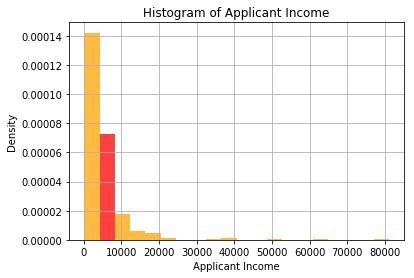

In [3]:

n, bins, patches = plt.hist(X['ApplicantIncome'].values, bins=20, facecolor='orange', alpha=0.75, normed=True)
plt.setp(patches[1], 'facecolor', 'r')
plt.ylabel('Density')
plt.xlabel('Applicant Income')
plt.title('Histogram of Applicant Income')
plt.grid(True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ECC80CC160>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

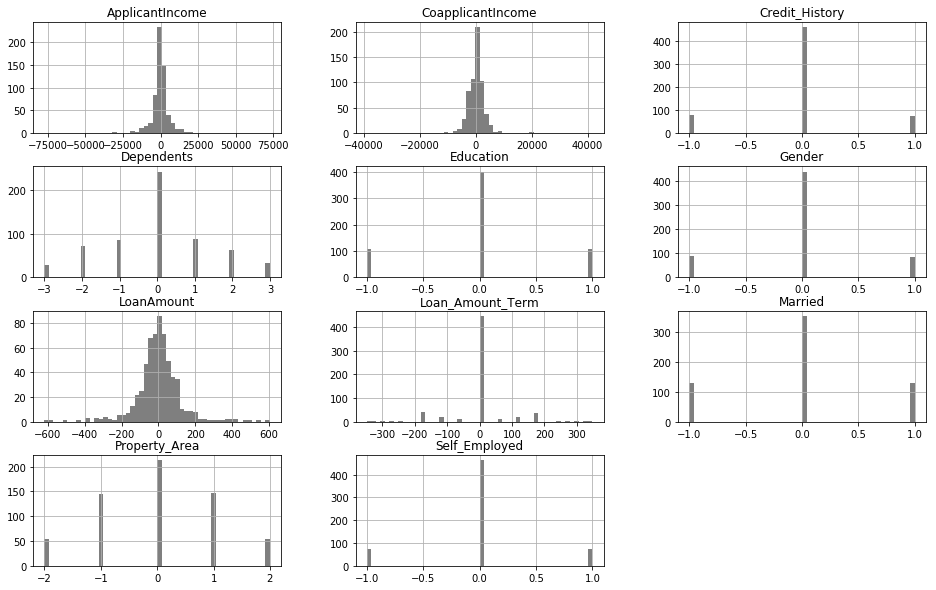

In [4]:
plt.figure()
X.diff().hist(color='k', alpha=0.5, bins=50,figsize=(16, 10))

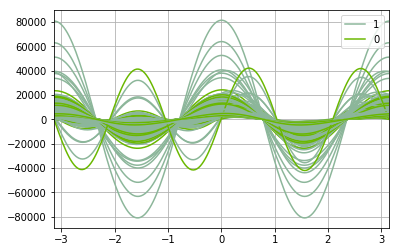

In [5]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(X, 'Gender')

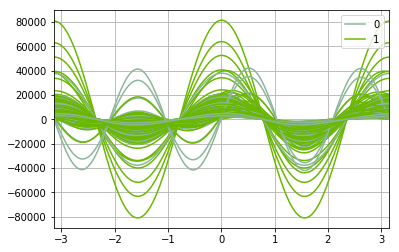

In [6]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(X, 'Married')

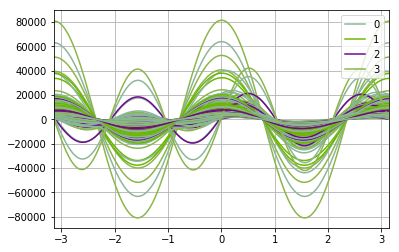

In [7]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(X, 'Dependents')

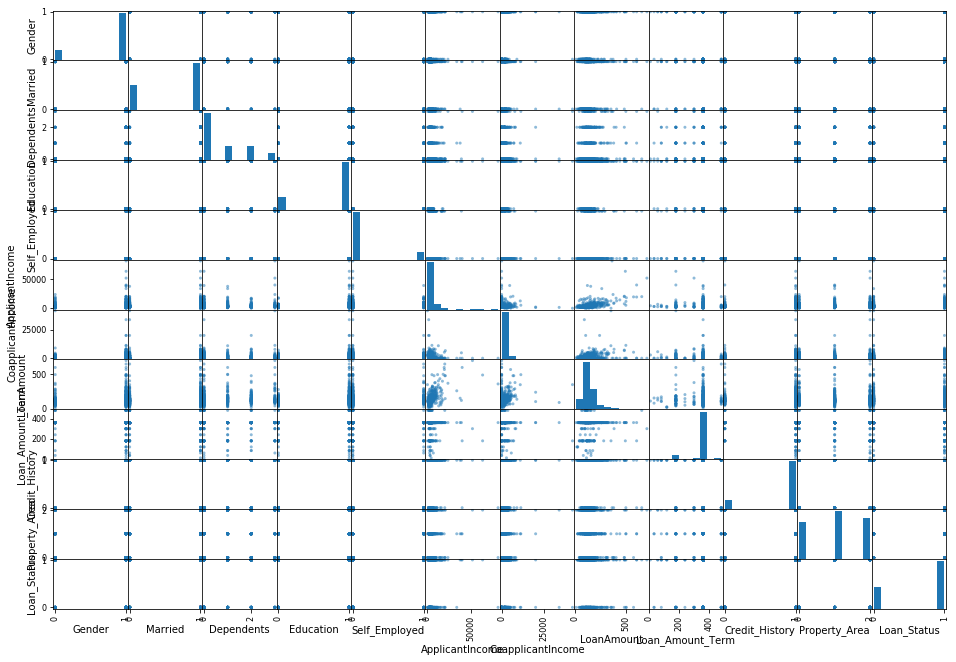

In [8]:
mat = pd.plotting.scatter_matrix(dataset, alpha=0.5,figsize=(16,11),diagonal='hist')


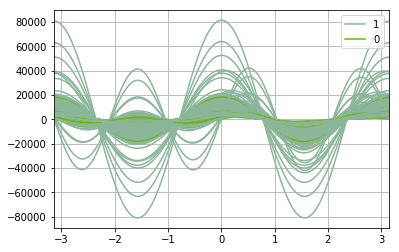

In [9]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(X, 'Education')

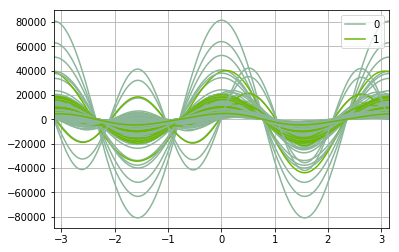

In [10]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(X, 'Self_Employed')

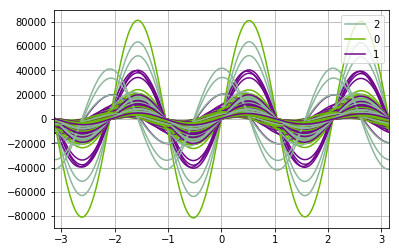

In [11]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(X, 'Property_Area')

In [12]:
dataset=pd.read_csv('loan-prediction1.csv')
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


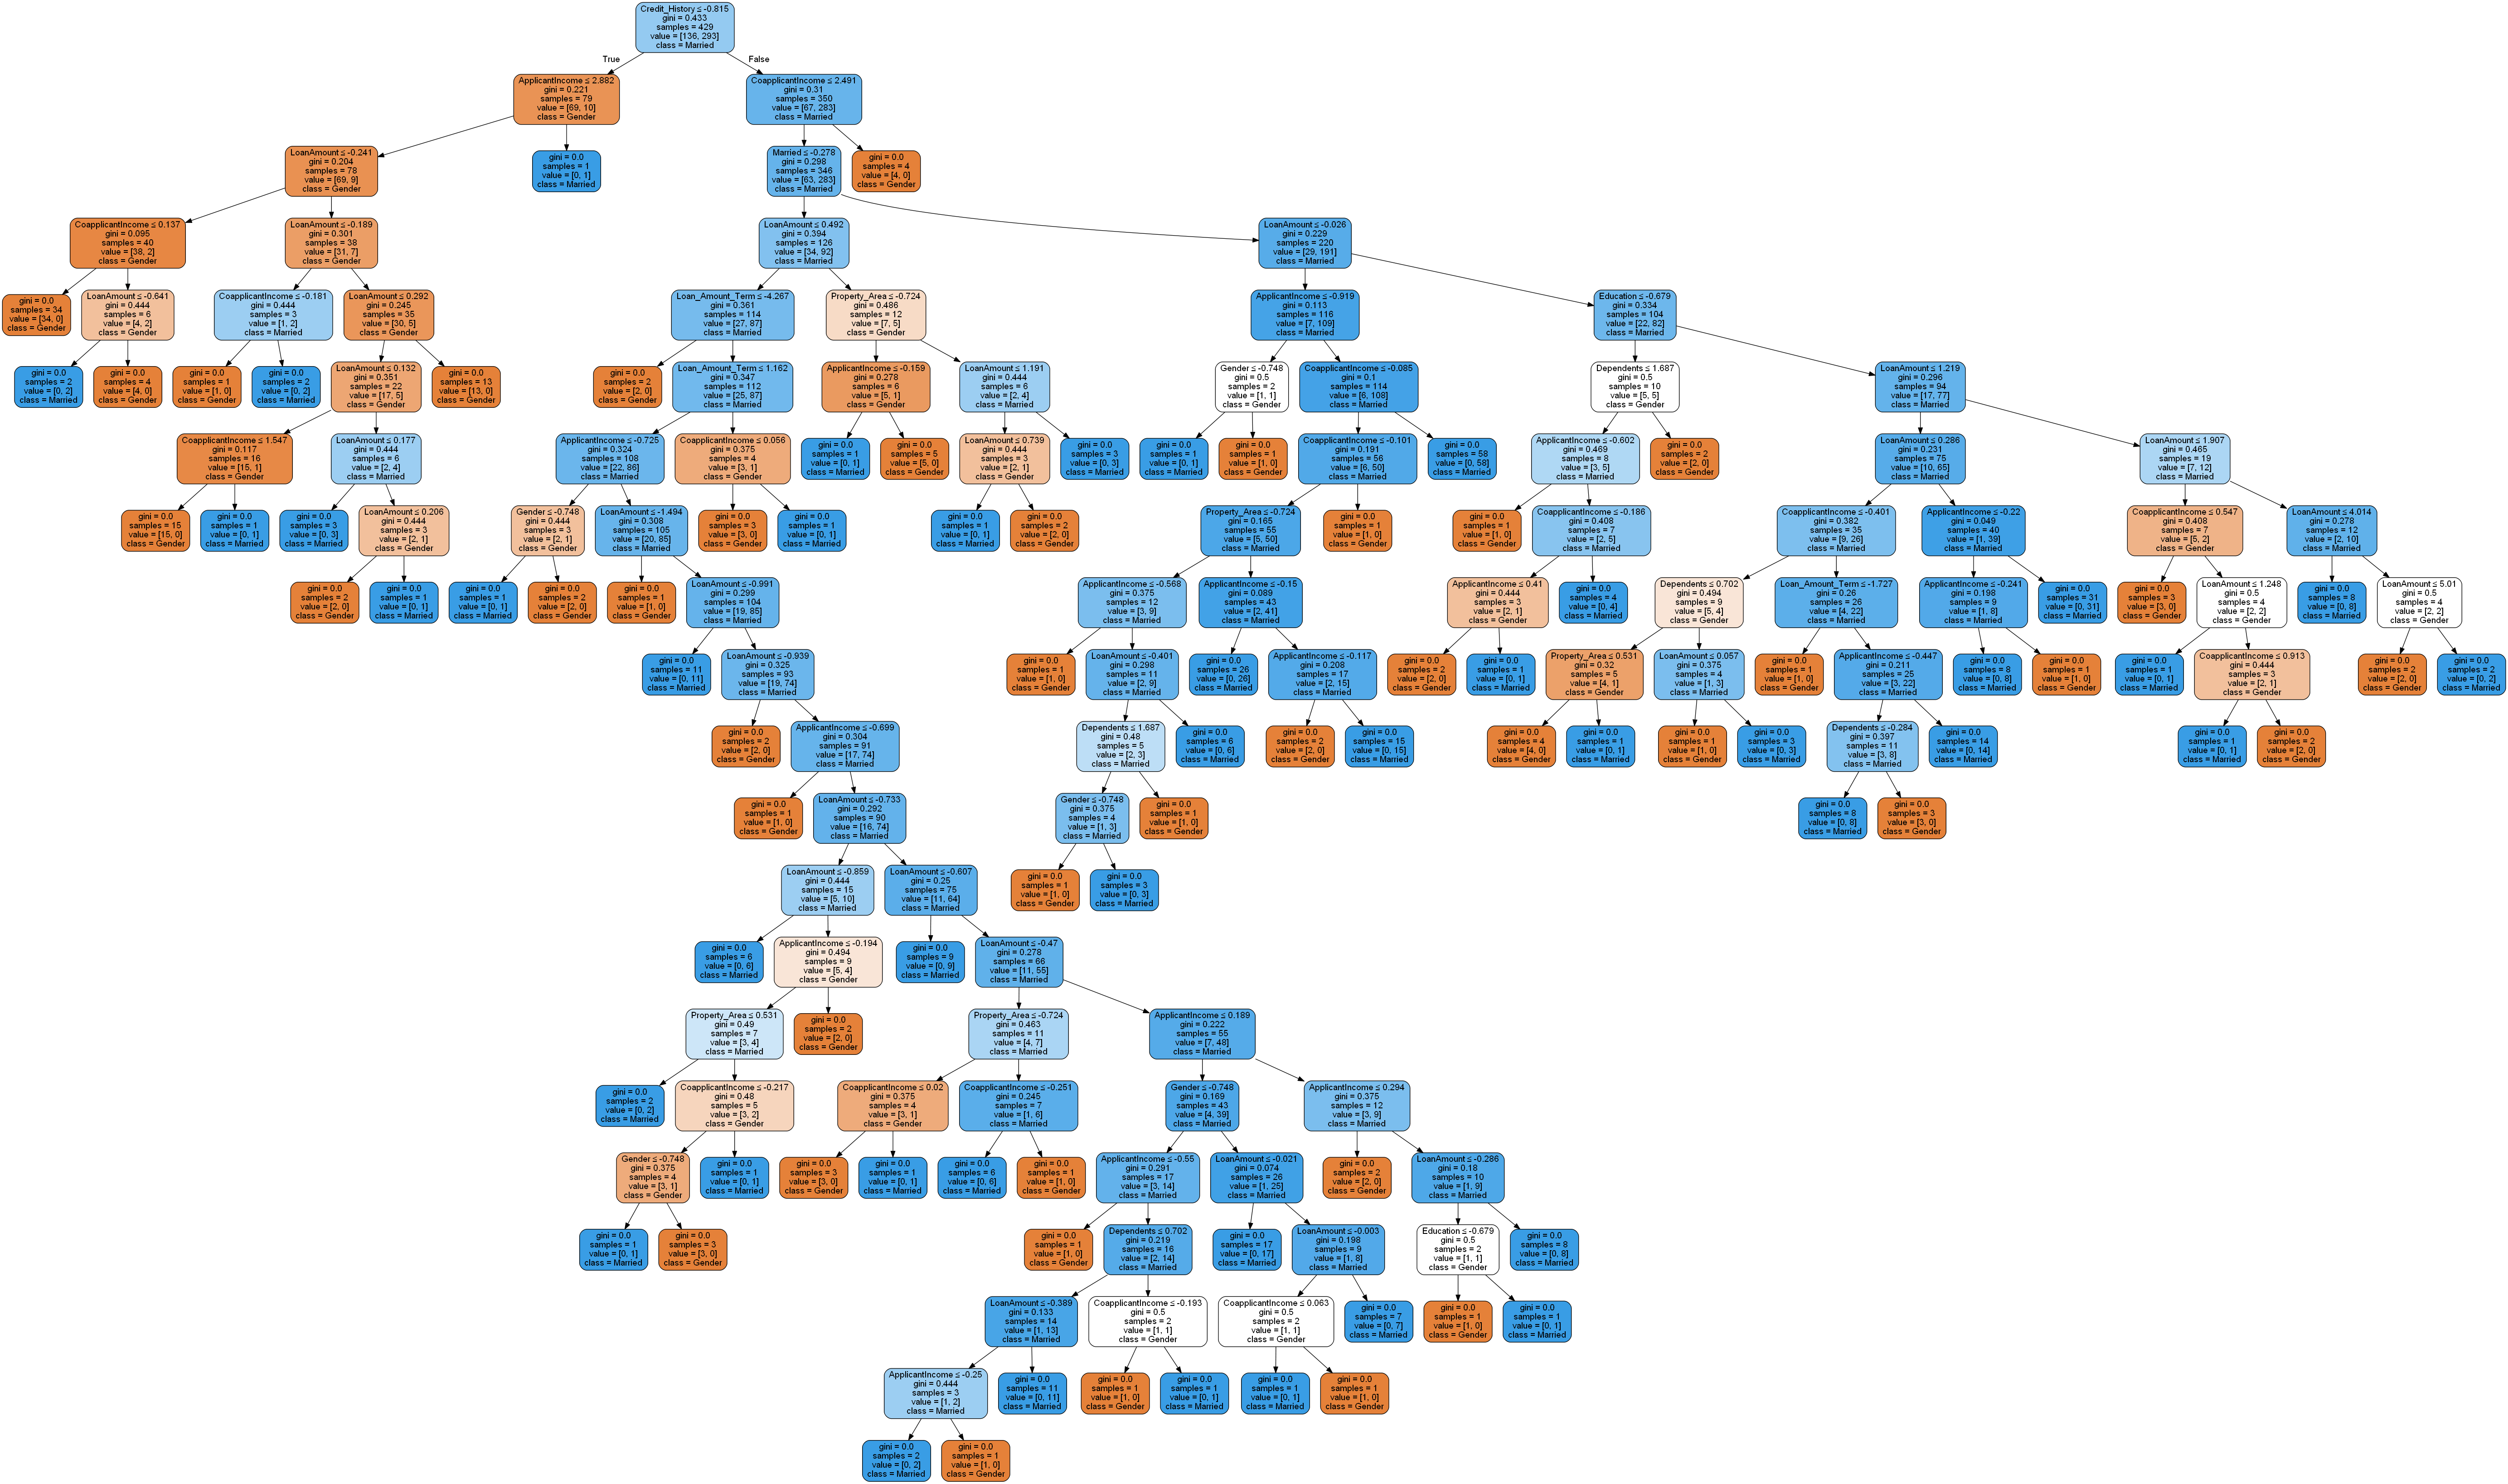

In [13]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree.pdf") 
Image(graph.create_png())

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


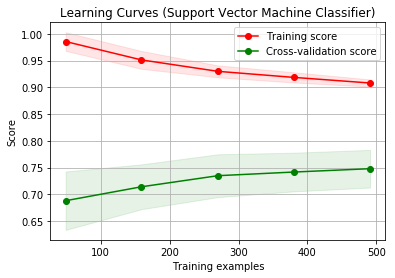

In [66]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
dataset=pd.read_csv('loan-prediction1.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_std=sc.transform(X)

from sklearn import svm
svm_cls = svm.SVC(gamma=0.05,C=100)
title = "Learning Curves (Support Vector Machine Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(svm_cls, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


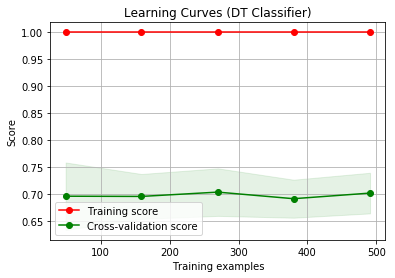

In [68]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
dataset=pd.read_csv('loan-prediction1.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_std=sc.transform(X)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state=5)
title = "Learning Curves (DT Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(dt, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


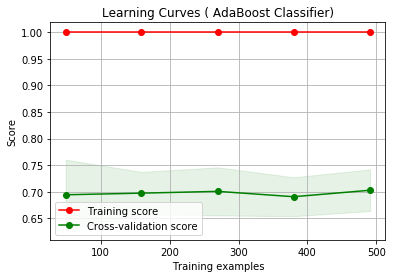

In [69]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
dataset=pd.read_csv('loan-prediction1.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_std=sc.transform(X)

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,learning_rate=0.01, random_state=0)
title = "Learning Curves ( AdaBoost Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(ada, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


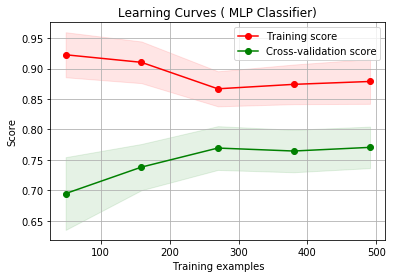

In [70]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
dataset=pd.read_csv('loan-prediction1.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_std=sc.transform(X)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,2), activation='logistic',max_iter=1000,learning_rate_init=0.005,tol=1e-41,solver='adam')

title = "Learning Curves ( MLP Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(mlp, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

In [41]:
import seaborn as sns
from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [42]:
from sklearn.model_selection import learning_curve
dataset=pd.read_csv('loan-prediction1.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std=sc.transform(X)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [43]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

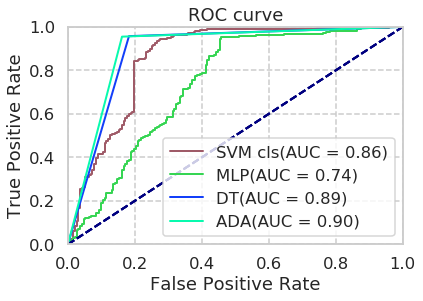

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

svm_cls = svm.SVC(gamma=0.05,C=100)
dt = DecisionTreeClassifier(criterion='gini',random_state=5)#,max_depth = 4,min_samples_leaf = 5)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,learning_rate=0.01, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(100,2), activation='logistic',max_iter=1000,learning_rate_init=0.005,tol=1e-41,solver='adam')


svm_cls.fit(X_train_std, y_train)
mlp.fit(X_train_std, y_train)
dt.fit(X_train_std, y_train)
ada.fit(X_train_std, y_train)

svm_cls_pred=svm_cls.predict(X_std)
mlp_pred=mlp.predict(X_std)
dt_pred=dt.predict(X_std)
ada_pred=ada.predict(X_std)

svm_cls_pred_proba=svm_cls.decision_function(X_std)
mlp_pred_proba=mlp.predict_proba(X_std)[:,1]
dt_pred_proba=dt.predict_proba(X_std)[:,1]
ada_pred_proba=ada.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'SVM cls')
plotAUC(y,mlp_pred_proba,'MLP')
plotAUC(y,dt_pred_proba,'DT')
plotAUC(y,ada_pred_proba,'ADA')
plt.show()

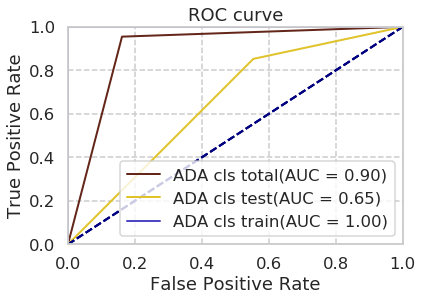

In [49]:


svm_cls_pred_proba_test=ada.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=ada.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=ada.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'ADA cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'ADA cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'ADA cls train')
plt.show()

In [24]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


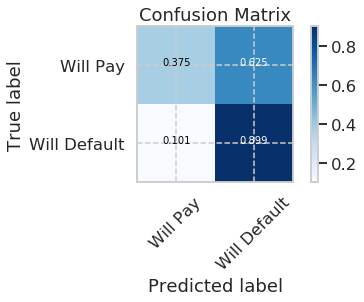

In [85]:
plot_confusion_matrix(svm_cls.predict(X_test_std), normalize=True)
plt.show()

In [96]:
#using the trained model
from sklearn.externals import joblib
svm_cls=joblib.load('svm_cls_model.joblib')
dt=joblib.load('dt_model.joblib')
mlp=joblib.load('mlp_model.joblib')
ada=joblib.load('ada_model.joblib')

import statistics as stat

import pandas as pd

df=pd.DataFrame(columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                         'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area',
                        'Loan_Status'])
dataset=pd.read_csv('loan-prediction1.csv')

for x in dataset.columns:
    df[x]=df[x].astype(dataset[x].dtypes)

X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

def max_count(f):
    a,b,c=0,0,0
    a=f.count(1)
    b=f.count(0)
    if a>b:
        c=1
    else:
        c=0
    return c
def find_top_3_mod(score):
    max_score=max(score)
    diff_max=max_score-min(score)
    m=[]
    for i in range(len(score)):
        if max_score-score[i]<diff_max:
            m.append(i)
    model=[]
    for i in m:
        if i==0:
            model.append(svm_cls)
        elif i==1:
            model.append(dt)
        elif i==2:
            model.append(ada)
        else:
            model.append(mlp)
    return(model)
'''def choose_predictor(m):
    model=[]
    for i in m:
        print(i)
        if i==0:
            model.append(svm_cls)
        elif i==1:
            model.append(dt)
        elif i==2:
            model.append(ada)
        else:
            model.append(mlp)
        print(model)
        return model'''
cc=0
def pred_preparation(V):
    global cc
    count=0
    arr1=[]
    f=[]
    arr=V
    score=[]
    model=[]
    df.loc[cc]=['predicted_'+str(cc)]+V+[0]
    for i in X.columns:
        p=[]
        for j in range(X.shape[0]):
            p.append(X[i][j])
        p.append(arr[count])
        s=stat.stdev(p)
        u=stat.mean(p)
        if s!=0:
            arr[count]=((arr[count]-u)/s)
        else:
            arr[count]=(arr[count]-u)
        count+=1
    score.append(mlp.score(X,y))
    score.append(svm_cls.score(X,y))
    score.append(dt.score(X,y))
    score.append(ada.score(X,y))
    
    model=find_top_3_mod(score)
    #print(model)
    #model=choose_predictor(m)
    for cou in model:
        f.extend(cou.predict([arr]))
        print(cou.predict([arr]))
       
    f_pred=max_count(f)
    df['Loan_Status'][cc]=f_pred
    cc+=1
    print(f_pred)



pred_preparation([1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2])#y
pred_preparation([1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1])#n
pred_preparation([1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2])#y
pred_preparation([1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1])#n
pred_preparation([1,1,0,1,0,1809,1868.0,90.000000,360.0,1.0,2])#y
pred_preparation([1,1,0,1,0,2083,3150.0,128.000000,360.0,1.0,1])#y





df.to_csv('predicted_loan_status.csv')

#map function from interface
def set_list(Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,
                         CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area):
    x=[]
    x.append(Gender)
    x.append(Married)
    x.append(Dependents)
    x.append(Education)
    x.append(Self_Employed)
    x.append(ApplicantIncome)
    x.append(CoapplicantIncome)
    x.append(LoanAmount)
    x.append(Loan_Amount_Term)
    x.append(Credit_History)
    x.append(Property_Area)
    pred_preparation(x)
    
    


[1]
[1]
[1]
1


C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0]
[0]
[0]
0
[1]
[1]
[1]


C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
[0]
[0]
[0]
0
[1]
[1]
[1]
1
[1]

C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[1]
[1]
1


C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, catego

IndexError: too many indices for array

In [24]:
model

[SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=5,
             splitter='best')]

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  app.launch_new_instance()


[ 89.54872962 105.80728482 104.62631106 ...  94.62351694 108.83857544
  96.27456231]


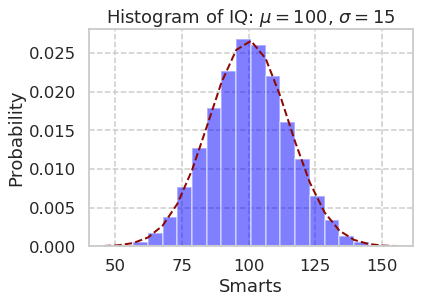

In [108]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
print(x)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [98]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [100]:
X['LoanAmount'].values

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 120.        , 201.        ,  74.        ,
       106.        , 114.        , 320.        , 146.41216216,
       100.        , 144.        , 184.        , 110.        ,
        80.        ,  47.        ,  75.        , 134.        ,
        96.        ,  88.        ,  44.        , 144.        ,
       120.        , 144.        , 100.        , 120.        ,
       112.        , 134.        , 286.        ,  97.        ,
        96.        , 135.        , 180.        , 144.        ,
       120.        ,  99.        , 165.        , 146.41

In [106]:
import statistics as stat
s=stat.stdev(X['LoanAmount'].values)
u=stat.mean(X['LoanAmount'].values)
print(s,u)

84.03746768319648 146.41216216216216


C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


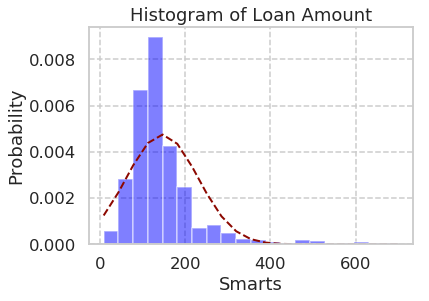

In [111]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x=X['LoanAmount'].values
import statistics as stat
s=stat.stdev(X['LoanAmount'].values)
u=stat.mean(X['LoanAmount'].values)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

y = mlab.normpdf(bins, u, s)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of Loan Amount')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


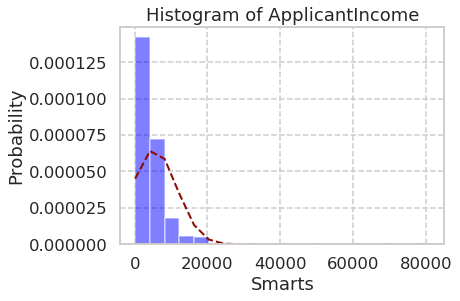

In [114]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x=X['ApplicantIncome'].values
import statistics as stat
s=stat.stdev(X['ApplicantIncome'].values)
u=stat.mean(X['ApplicantIncome'].values)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

y = mlab.normpdf(bins, u, s)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of ApplicantIncome')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


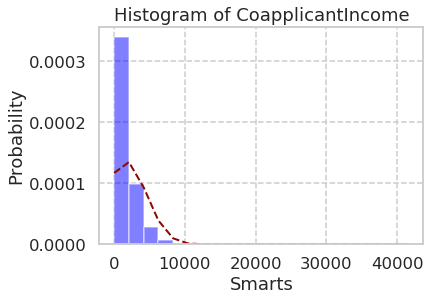

In [116]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x=X['CoapplicantIncome'].values
import statistics as stat
s=stat.stdev(X['CoapplicantIncome'].values)
u=stat.mean(X['CoapplicantIncome'].values)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

y = mlab.normpdf(bins, u, s)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of CoapplicantIncome')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


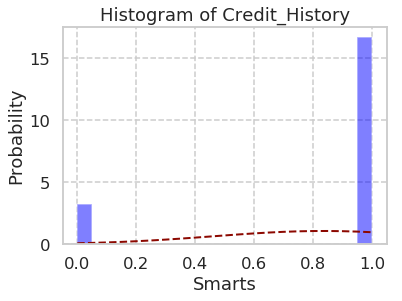

In [117]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x=X['Credit_History'].values
import statistics as stat
s=stat.stdev(X['Credit_History'].values)
u=stat.mean(X['Credit_History'].values)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

y = mlab.normpdf(bins, u, s)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of Credit_History')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


ZeroDivisionError: float division by zero

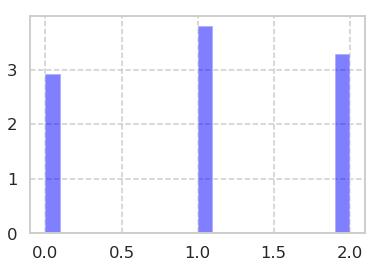

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


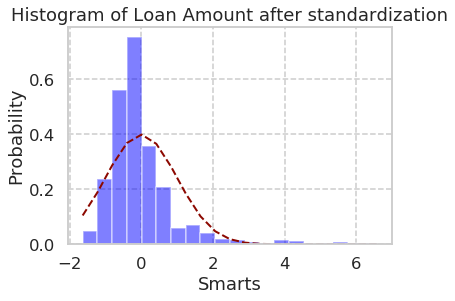

In [122]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x=(X['LoanAmount'].values-stat.mean(X['LoanAmount'].values))/stat.stdev(X['LoanAmount'].values)
import statistics as stat
s=1#stat.stdev(X['LoanAmount'].values)
u=0#stat.mean(X['LoanAmount'].values)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

y = mlab.normpdf(bins, u, s)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of Loan Amount after standardization')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


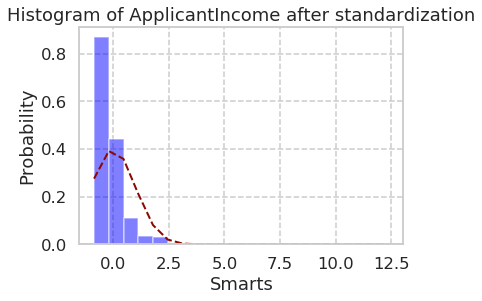

In [123]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x=(X['ApplicantIncome'].values-stat.mean(X['ApplicantIncome'].values))/stat.stdev(X['ApplicantIncome'].values)
import statistics as stat
s=1#stat.stdev(X['LoanAmount'].values)
u=0#stat.mean(X['LoanAmount'].values)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

y = mlab.normpdf(bins, u, s)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of ApplicantIncome after standardization')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


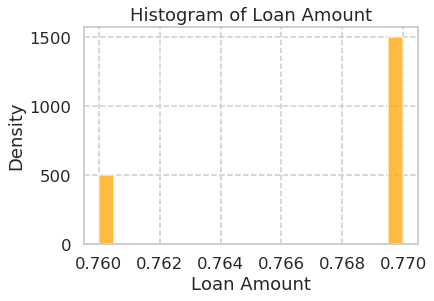

In [53]:
x=[0.77,0.76,0.77,0.77]

n, bins, patches = plt.hist(x, bins=20, facecolor='orange', alpha=0.75, normed=True,stacked=False)
plt.setp(patches[1], 'facecolor', 'r')
plt.ylabel('Density')
plt.xlabel('Loan Amount')
plt.title('Histogram of Loan Amount')
plt.grid(True)
plt.show()

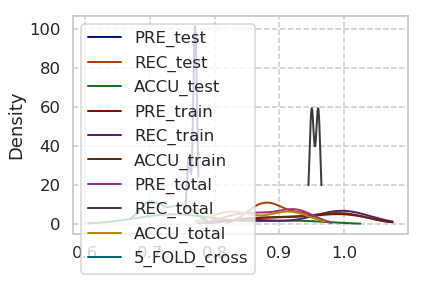

In [81]:
df=pd.DataFrame({
    'PRE_test':[0.77 , 0.76 , 0.77 , 0.77],
    'REC_test':[0.90 , 0.86 , 0.88 , 0.94],
    'ACCU_test':[0.74 , 0.71 , 0.92 , 0.76],
    'PRE_train':[0.92 , 1.0 , 1.0 , 0.85],
    'REC_train':[0.99,1.0,1.0,0.85],
    'ACCU_train':[0.93,1.0,1.0,0.86],
    'PRE_total':[0.87,0.92,0.93,0.83],
    'REC_total':[0.96,0.96,0.95,0.95],
    'ACCU_total':[0.82,0.91,0.92,0.83],
    '5_FOLD_cross':[0.74,0.70,0.70,0.76],
})
ax = df.plot.kde(bw_method=0.59)